<a href="https://colab.research.google.com/github/PradyumnaCharate/Flower-Species-Recognition/blob/main/Deep_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets --quiet

In [26]:
import os
from torchvision.datasets import ImageFolder
import torchvision.transforms as tt
from torch.utils.data import random_split
from torch.utils.data import DataLoader

In [3]:
import opendatasets as od
od.download("https://www.kaggle.com/alxmamaev/flowers-recognition")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pradyumnacharate
Your Kaggle Key: ··········


100%|██████████| 225M/225M [00:01<00:00, 178MB/s]


#Import the dataset into pytorch

In [4]:
data_dir="./flowers-recognition/flowers"

In [5]:
os.listdir(data_dir)

['sunflower', 'daisy', 'dandelion', 'tulip', 'rose']

In [6]:
dataset=ImageFolder(data_dir)

In [7]:
len(dataset)

4317

In [8]:
dataset.classes

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

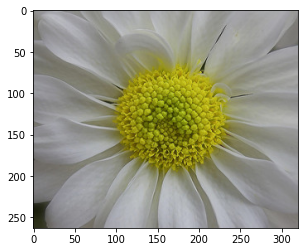

In [9]:
import matplotlib.pyplot as plt
image,label=dataset[0]
plt.imshow(image)

In [10]:
dataset=ImageFolder(data_dir,tt.Compose([tt.Resize(224),
                                         tt.RandomCrop(224),
                                         tt.ToTensor()]))

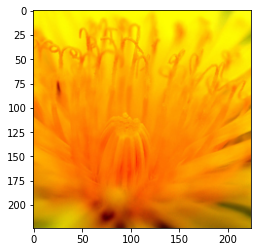

In [17]:
import matplotlib.pyplot as plt
image,label=dataset[1501]
plt.imshow(image.permute(1,2,0))

In [19]:
val_percentage=0.1
val_size=int(val_percentage*len(dataset))
train_size=len(dataset)-val_size
train_size,val_size

(3886, 431)

In [22]:
train_ds,val_ds=random_split(dataset,[train_size,val_size])
len(train_ds)

3886

In [28]:
batch_size=128
train_dl=DataLoader(train_ds,
                    batch_size,
                    shuffle=True,
                    num_workers=2,
                    pin_memory=True
                    )
val_dl=DataLoader(val_ds,
                    batch_size*2,
                    shuffle=True,
                    num_workers=2,
                    pin_memory=True
                    )

In [29]:
from torchvision.utils import make_grid
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        #denorm_images = denormalize(images, *stats)
        ax.imshow(make_grid(images[:64], nrow=8).permute(1, 2, 0).clamp(0,1))
        break


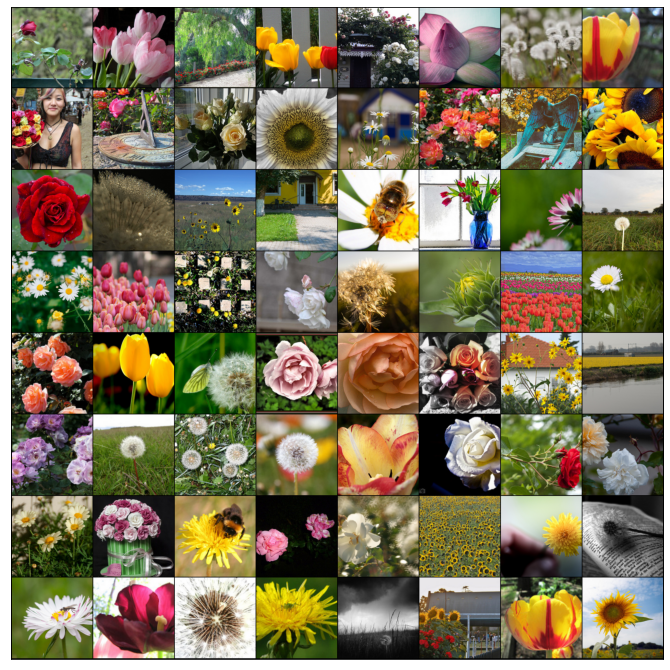

In [31]:
show_batch(train_dl)